This is a code for SARIMA model

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
import useful_functions



In [7]:
# Load the normalized dataset
file_path = '../data/BR_param_EDA.csv'
BR_param_EDA = pd.read_csv(file_path, index_col='date', parse_dates=['date'])

# Set the target variable to be the first one
target_variable = BR_param_EDA.columns[0]



In [8]:
target_variable

'eco_fiscal_result_month'

In [9]:
# Clean the dataset to remove NaNs and Infs
BR_param_norm = useful_functions.clean_dataset(BR_param_EDA)


# Normalize the dataset
type_standardization = 'normalize' # or 'standardize'

"""
The next method will standardize/normalize the dataset and return the parameters used to do so.
par_1 and par_2 are used to reverse the standardization/normalization process
"""
# Call method standardize/normalize the dataset
BR_param_norm, params = useful_functions.standardize_data(BR_param_norm, type_choice=type_standardization)

# Call method to detect and apply differencing
BR_macro_diff, diff_variables, diff_order, df_original = useful_functions.apply_differecing(
    BR_param_norm, order=1, reverse=False, variables_to_diff=None)


In [10]:
BR_macro_diff[target_variable]

date
2002-01-01    0.736456
2002-02-01    0.718629
2002-03-01    0.719247
2002-04-01    0.731696
2002-05-01    0.717549
                ...   
2023-07-01    0.592539
2023-08-01    0.615469
2023-09-01    0.650708
2023-10-01    0.781673
2023-11-01    0.569068
Name: eco_fiscal_result_month, Length: 263, dtype: float64

In [11]:
# Split the data and train the model


# Split the data into train and test sets
train, test = train_test_split(BR_macro_diff[target_variable], test_size=0.30, shuffle=False)

# Use auto_arima to find the best SARIMA parameters on the training set
auto_arima_model = auto_arima(train, seasonal=True, m=12, trace=False, error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit the model with the best parameters 
model = auto_arima_model.fit(train)

# Forecast on the test set using the model fitted 
test_forecast = model.predict(n_periods=len(test))



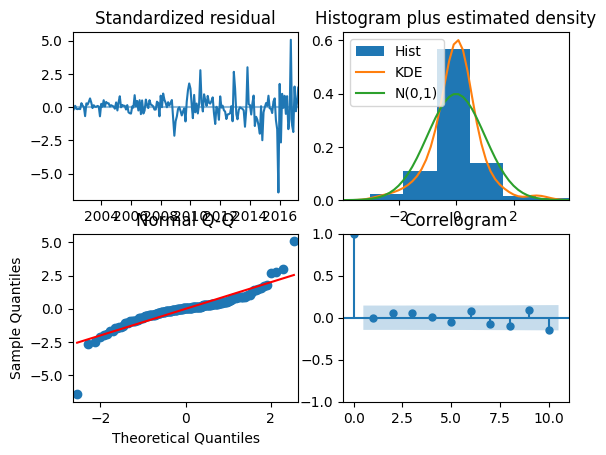

In [12]:
model.plot_diagnostics();

In [11]:
#Check reverse differencing
BR_reversed_diff = useful_functions.apply_differecing(
    BR_macro_diff.copy(), 
    order=diff_order, 
    reverse=True, 
    variables_to_diff = diff_variables, 
    first_obs = df_original)



In [9]:
# Reverse the standardization/normalization
BR_reversed = useful_functions.standardize_data(
    BR_reversed_diff, type_choice=type_standardization, reverse=True, original_params=params)




,eco_fiscal_result_month,eco_net_debt_R$,eco_net_debt_R$_federal_govt,eco_GDP_R$_12_months,Coffee,Iron Ore,Meat index,Soybeans,Sugar,bud_group_personal_spent_value,...,eco_total_revenue_synthet_roll_std_12,eco_total_revenue_synthet_lag_2,eco_total_revenue_synthet_roll_mean_12.1,eco_total_revenue_synthet_roll_std_12.1,eco_total_revenue_synthet_lag_6,eco_total_revenue_synthet_roll_mean_12.2,eco_total_revenue_synthet_roll_std_12.2,eco_total_revenue_synthet_lag_12,eco_total_revenue_synthet_roll_mean_12.3,eco_total_revenue_synthet_roll_std_12.3
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,2629.62,541333.74,337611.99,1209046.1,40.071176,22.180411,65.938729,48.364891,57.667171,6.267857e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,1053.24,550253.48,346552.50,1218911.0,41.061710,22.180411,67.675046,46.167638,54.237585,6.267857e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-01,3884.62,561959.20,355037.50,1234635.0,40.689646,22.180411,74.216554,45.319131,51.038821,6.267857e+10,...,NaN,22633.832094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-01,6500.83,565464.63,360694.52,1250830.7,40.281754,22.180411,74.332002,43.729764,47.728943,6.267857e+10,...,NaN,18150.773048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-01,4011.68,581727.09,374879.99,1263306.0,42.499579,22.180411,77.675190,45.179824,52.168986,6.267857e+10,...,NaN,20083.742154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Evaluate the forecast (e.g., using RMSE)
test_rmse = sqrt(mean_squared_error(test, test_forecast))
test_mae = mean_absolute_error(test, test_forecast)
print(f'Test RMSE: {test_rmse}')
print(f'Test MAE: {test_mae}')

Test RMSE: 0.13994021109361657
Test MAE: 0.09042993453231729


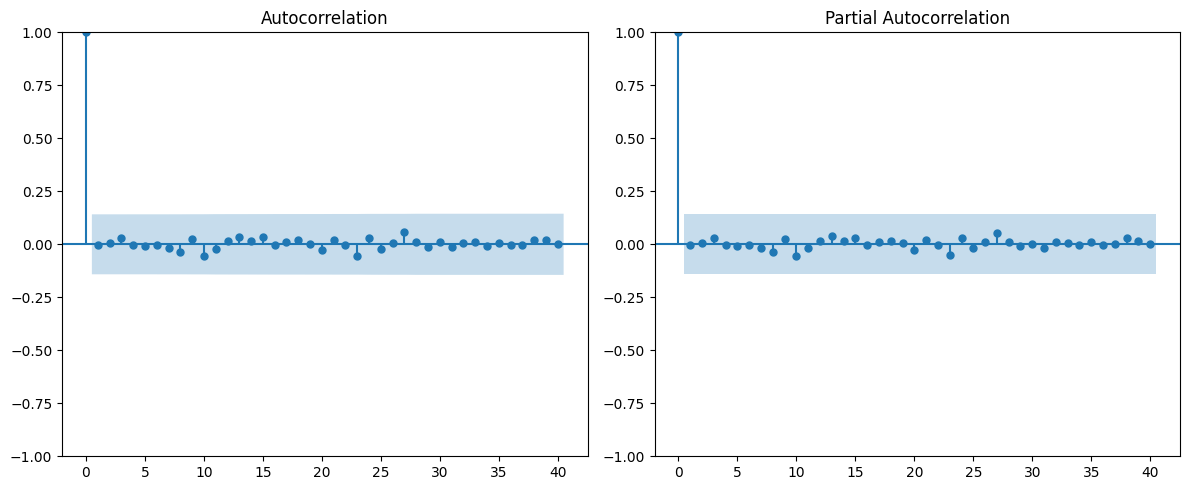

In [9]:
# Let's check the residuals to evaluate the model

model_residuals = model.resid()

# Plot ACF and PACF for the residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.tsa.plot_acf(model_residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(model_residuals, lags=40, ax=ax[1])

plt.tight_layout()
plt.show()

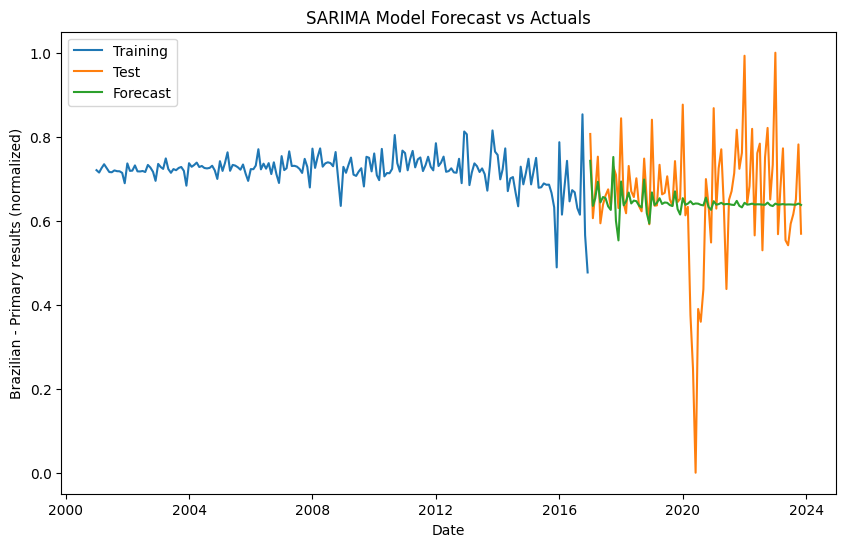

In [10]:
# Plotting

# Convert the series to dataframes
train_df = pd.DataFrame({'date': pd.to_datetime(train.index), target_variable: train.values}).set_index('date').to_period('M')
test_df = pd.DataFrame({'date': pd.to_datetime(test.index), target_variable: test.values}).set_index('date').to_period('M')

# Convert index to datetime objects
train_df.index = train_df.index.to_timestamp()
test_df.index = test_df.index.to_timestamp()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_df[target_variable], label='Training')
plt.plot(test_df[target_variable], label='Test')
plt.plot(test_df.index, test_forecast, label='Forecast')
plt.legend()
plt.title('SARIMA Model Forecast vs Actuals')
plt.ylabel('Brazilian - Primary results (normalized)')
plt.xlabel('Date')
plt.show()